<h1>FRF of a SDOF system</h1>

## Table of Contents

* [System properties](#1)
* [Frequency response function](#2)


<img src="1DOF.PNG" width="400">

### System properties <a class="anchor" id="1"></a>

In [6]:
import numpy as np


# System properties
m = 8                         # Mass (kg)
k = 200                       # Stiffness (N/m)
zeta = 0.02                   # Damping ratio
omega = np.sqrt(k / m)        # Natural frequency (rad/s)
c = 2 * zeta * omega          # Damping coefficient (N*s/m)


### Frequency response function <a class="anchor" id="2"></a>


Now we calculate the frequency response function. The FRF can be calculated as:

$H(s) = (ms^2 + cs + k)^{-1}$


where $s = j\omega$ is the Laplace variable, then $H(j\omega) = (k - m \omega^2 + jc\omega)^{-1}$


In [2]:
# Frequency response function
nf = 1000                                                  # Number of frequency points for FRF calculation
f = np.linspace(0, 2, nf)                                  # Generating the Frequency vector (Hz)
OmegaVector = 2 * np.pi * f                                # Frequency vector (rad/s)

# Calculate the Frequency Response Function (FRF) FRF-H
H = 1.0 / (k - m * OmegaVector**2 + 1j * c * OmegaVector)  # FRF - Healthy structure (1j represents the imaginary unit)

Now we will plot the analytical FRFs of the system

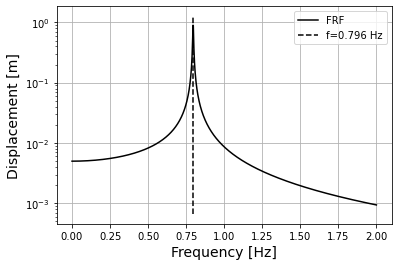

In [3]:
import matplotlib.pyplot as plt

# Plotting the FRF
plt.figure(1)

# Plotting y-axis log scale of the FRF 
h1, = plt.semilogy(f, np.abs(H), '-k')

# Getting lower and upper limits of the y-axis
yl = plt.gca().get_ylim()

# Plotting a line at the natural frequency in Hz
h2, = plt.semilogy([omega / (2 * np.pi), omega / (2 * np.pi)], yl, '--k')

# Adding x-label and y-label
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('Displacement [m]', fontsize=14)

# Adding a legend
num_f=round(omega / (2 * np.pi),3)
plt.legend([h1, h2], ['FRF', 'f='+ str(num_f) + ' Hz'], loc='upper right')
# Turning on the grid
plt.grid(True)

# Show the plot
plt.show()


Now, let's reduce the stiffiness value to be k=150 (N/m) and evalaute the differencies

In [4]:
kD = 150.0                                                   # Stiffness (N/m)
omega1 = np.sqrt(kD / m)                                     # Damaged Natural frequency (rad/s)

# Calculate the Frequency Response Function (FRF) FRF-D
HD = 1.0 / (kD - m * OmegaVector**2 + 1j * c * OmegaVector)  # FRF - Damaged structure (1j represents the imaginary unit)

Now we will plot the analytical FRFs of the Healthy & Damaged system

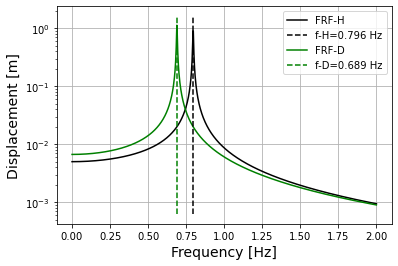

In [5]:
# Plotting the FRF
plt.figure(2)

# Plotting y-axis log scale of the FRF
h1, = plt.semilogy(f, np.abs(H), '-k')
h1D, = plt.semilogy(f, np.abs(HD), '-g')

# Getting lower and upper limits of the y-axis
yl = plt.gca().get_ylim()

# Plotting a line at the natural frequency in Hz
h2, = plt.semilogy([omega / (2 * np.pi), omega / (2 * np.pi)], yl, '--k')
h2D, = plt.semilogy([omega1 / (2 * np.pi), omega1 / (2 * np.pi)], yl, '--g')

# Adding x-label and y-label
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('Displacement [m]', fontsize=14)

# Adding a legend
num_f=round(omega / (2 * np.pi),3)
num_fD=round(omega1 / (2 * np.pi),3)
plt.legend([h1, h2, h1D, h2D], ['FRF-H', 'f-H='+ str(num_f) + ' Hz', 'FRF-D','f-D='+ str(num_fD) + ' Hz'], loc='upper right')
# Turning on the grid
plt.grid(True)

# Show the plot
plt.show()